In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we will unload our recipes! 

In [2]:
recipes = pd.read_csv('epi_r_full.csv', sep=",", index_col=0)
recipes

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
title,,,,,,,,,,,,,,,,,,,,,
"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Let's preview the categories we have in hand!

In [3]:
categories = list(recipes.columns)[5:]
categories

['#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broccoli',
 'broccoli rabe',
 'broil',
 'brooklyn',
 'brow

We will choose one target for our case-study which is dessert. Let's perform an initial logistic regression analysis. 

In [4]:
from sklearn.model_selection import train_test_split



def getTestTrainData(X, y):
    xtr, xts, ytr, yts = train_test_split(X, y, test_size=0.33)
    return xtr, xts, ytr, yts

target = 'dessert'



categories.remove(target)
X = recipes.loc[:, categories].to_numpy()
categories.append(target)
y = recipes.loc[:, recipes.columns== target].to_numpy().ravel()


xtr, xts, ytr, yts = getTestTrainData(X, y)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def getMetrics(yts, yhat):
    accuracy = accuracy_score(yts, yhat)
    precision,recall,f1_score,_  = precision_recall_fscore_support(yts,yhat,average='binary') 
    return accuracy, precision, recall, f1_score

        
logreg = LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(xtr,ytr)
yhat = logreg.predict(xts)
accuracy,precision,recall,f1_score = getMetrics(yts, yhat)
print('Test accuracy of {} is {}'.format(target, accuracy))
print('Test precision of {} is {}'.format(target, precision))
print('Test recall of {} is {}'.format(target, recall))
print('Test f1-score of {} is {}'.format(target, f1_score))

Test accuracy of dessert is 0.9681054239877769
Test precision of dessert is 0.9146090534979424
Test recall of dessert is 0.9136690647482014
Test f1-score of dessert is 0.9141388174807198


Can we improve our results? Let's first attempt a normal kfold cross-validation. 

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)


ny = np.max(y)
C = np.zeros((2, 2))


# TODO 11
acc = np.zeros(nfold)
prec = np.zeros(nfold)
rec = np.zeros(nfold)
f1 = np.zeros(nfold)
error_rate = np.zeros(nfold)


for i, I in enumerate(kf.split(X)):
    
    # Get training and test data
    train, test = I
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    
    # Fit a model    
    logreg.fit(Xtr, ytr)
    
    # Predict on test samples and measure accuracy
    yhat = logreg.predict(Xts)
    acc[i] = np.mean(yhat == yts)
    
    # Measure other performance metrics
    prec[i],rec[i],f1[i],_  = precision_recall_fscore_support(yts,yhat,average='binary') 
    error_rate[i] = np.mean(yts != yhat)
    
    C += confusion_matrix(yts,yhat)
    

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)
error_mean = np.mean(error_rate)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)
error_se=np.std(error_rate)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))
print('Error Rate =  {0:.4f}, SE={1:.4f}'.format(error_mean, error_se))

Precision = 0.9241, SE=0.0084
Recall =    0.9257, SE=0.0072
f1 =        0.9246, SE=0.0052
Accuracy =  0.9719, SE=0.0019
Error Rate =  0.0281, SE=0.0019


Well it has indeed improved with different splits of data but now what if we try different hyper-parameters for our model? 

In [7]:
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold, shuffle=True)

acc = np.zeros(nfold)
prec = np.zeros(nfold)
rec = np.zeros(nfold)
f1 = np.zeros(nfold)

C = np.logspace(1, 4, num= 20)
error_matrix = np.zeros((20, 10))

conf_matrix = np.zeros((2, 2))

for ci, c in enumerate(C):
    for i, Ind in enumerate(kf.split(X)):
        Itr, Its = Ind
        Xtr = X[Itr, :]
        ytr = y[Itr]
        Xts = X[Its, :]
        yts = y[Its]
        
        
        logreg = LogisticRegression(C=c,solver='liblinear')
        logreg.fit(Xtr, ytr)
        
        yhat = logreg.predict(Xts)
        error_matrix[ci][i] = np.mean(yhat != yts)   
        conf_matrix += confusion_matrix(yts,yhat)


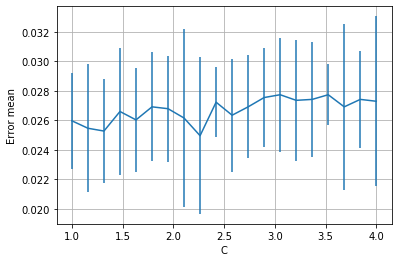

In [8]:
error_mean = np.mean(error_matrix, axis = 1)
std_error = np.std(error_matrix, axis=1) * np.sqrt(nfold)/np.sqrt(nfold-1)
plt.errorbar(np.log10(C), error_mean, yerr= std_error, fmt='-')
plt.xlabel('C')
plt.ylabel('Error mean')
plt.grid()

We see that the error mean is low for log(C) at around 1.3. Let's print the confusion matrix for our cross-validation. 

In [9]:
Csum= np.sum(conf_matrix,1)
conf_matrix = conf_matrix/Csum[np.newaxis,:]
print(np.array_str(conf_matrix, precision = 4, suppress_small = True))

[[0.9841 0.0695]
 [0.0169 0.9259]]


Now let's run our classification with the improved hyper-parameters and check the metrics. 

In [10]:
import sklearn.metrics as metrics

imin = np.argmin(error_mean)
print("The selected penalty is {}".format(C[imin]))
Xtr, Xts, ytr, yts = getTestTrainData(X, y)
logreg = LogisticRegression(penalty= 'l1', C=C[imin],solver='liblinear')
logreg.fit(Xtr,ytr)
yhat = logreg.predict(Xts)

accuracy,precision,recall,f1_score = getMetrics(yts, yhat)
print('Test accuracy of {} is {}'.format(target, accuracy))
print('Test precision of {} is {}'.format(target, precision))
print('Test recall of {} is {}'.format(target, recall))
print('Test f1-score of {} is {}'.format(target, f1_score))



The selected penalty is 183.29807108324357
Test accuracy of dessert is 0.9648586707410237
Test precision of dessert is 0.9089989888776542
Test recall of dessert is 0.905337361530715
Test f1-score of dessert is 0.9071644803229062


We will save a roc value for our logistic regression which we will use later when comparing other models. 

In [11]:
from sklearn.metrics import auc
yproba_lr= logreg.predict_proba(Xts)
fpr_lr, tpr_lr, _ = metrics.roc_curve(yts, yproba_lr[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lr

0.9927155656410808

We can make out useful relations between the features and draw interesting conclusions. Now let's try other models and select the best.

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = SGDClassifier()
# defining parameter range
param_grid = {'alpha': [0.1, 1, 10, 100, 1000],
              'loss': ['log']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xtr, ytr)

In [13]:
yproba_sgd= grid_search.predict_proba(Xts)
fpr_sgd, tpr_sgd, _ = metrics.roc_curve(yts, yproba_sgd[:, 1])

roc_auc_sgd = auc(fpr_sgd, tpr_sgd)

roc_auc_sgd 

0.9584630713367364

In [14]:
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1, 10))
grid = dict(n_neighbors=k_range)

model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xtr, ytr)

In [15]:
yproba_knn= grid_search.predict_proba(Xts)
fpr_knn, tpr_knn, _ = metrics.roc_curve(yts, yproba_knn[:, 1])

roc_auc_knn = auc(fpr_knn, tpr_knn)

roc_auc_knn 

0.9698787102458192

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scoring = ['accuracy','precision','recall','f1']

print("# Tuning hyper-parameters")
print()

model = SVC()
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
clf = GridSearchCV(estimator=model,param_grid=tuned_parameters, n_jobs=-1, scoring=scoring, error_score=0, refit='accuracy')
grid_result = clf.fit(Xtr,ytr)

print("Best parameters set found on development set:")
print()
best_parameters = grid_result.best_params_
print(best_parameters)
'''print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()'''

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = yts, clf.predict(Xts)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4243
         1.0       0.94      0.91      0.93       993

    accuracy                           0.97      5236
   macro avg       0.96      0.95      0.95      5236
weighted avg       0.97      0.97      0.97      5236




In [17]:
from sklearn import svm

svc = svm.SVC( kernel=grid_result.best_params_['kernel'], C=grid_result.best_params_['C'], gamma =grid_result.best_params_['gamma'],  probability = True)
svc.fit(Xtr,ytr)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
yproba_svc= svc.predict_proba(Xts)
fpr_svc, tpr_svc, _ = metrics.roc_curve(yts, yproba_svc[:, 1])

roc_auc_svc = auc(fpr_svc, tpr_svc)

accuracy,precision,recall,f1_score = getMetrics(yts, yhat)
print('Test accuracy of {} is {}'.format(target, accuracy))
print('Test precision of {} is {}'.format(target, precision))
print('Test recall of {} is {}'.format(target, recall))
print('Test f1-score of {} is {}'.format(target, f1_score))

roc_auc_svc

Test accuracy of dessert is 0.9648586707410237
Test precision of dessert is 0.9089989888776542
Test recall of dessert is 0.905337361530715
Test f1-score of dessert is 0.9071644803229062


0.9905960863446909

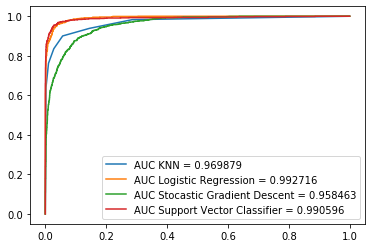

In [19]:
plt.plot(fpr_knn,tpr_knn,label='AUC KNN = %0.6f' % roc_auc_knn)
plt.plot(fpr_lr,tpr_lr, label='AUC Logistic Regression = %0.6f' % roc_auc_lr)
plt.plot(fpr_sgd,tpr_sgd,label='AUC Stocastic Gradient Descent = %0.6f' % roc_auc_sgd)
plt.plot(fpr_svc,tpr_svc,label='AUC Support Vector Classifier = %0.6f' % roc_auc_svc)

plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (5,5)
plt.show()


SVC and Logistic Regression are fairly the same. Let's go with Logistic regression as it is convenient to analyse the feature importance. 

(673,)


C:\py\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

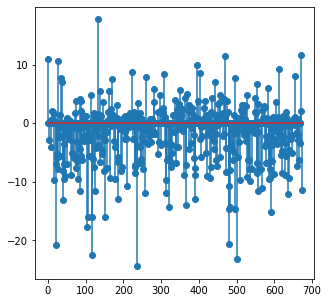

In [20]:
W = logreg.coef_.ravel()
print(W.shape)
plt.stem(W)

As evident from the stem plot, only a few features matter. Hence we will just study the top correlated features.

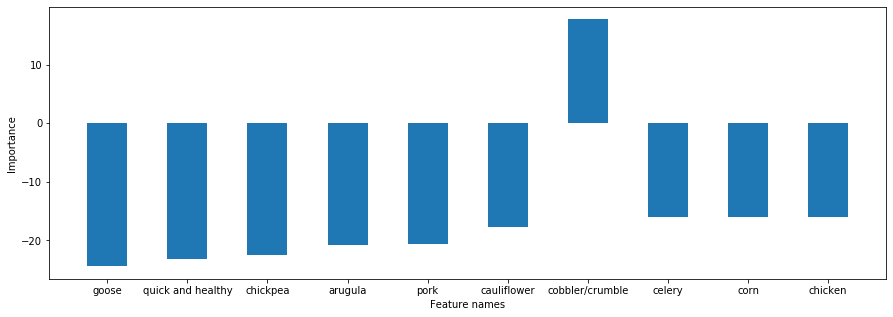

In [21]:
index = np.argsort(np.abs(W))
'''print(index)
for i in index:
    print(categories[i])
    print(W[i])

'''
top_predictors = []
top_wval = []
for i in range(10):
    top_predictors.append(categories[index[-i-1]])
    top_wval.append(W[index[-i-1]])
    
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 5))
plt.bar(top_predictors, top_wval,width = 0.5)
plt.xlabel("Feature names")
plt.ylabel("Importance")
plt.show()

High negative correlation means the feature is more unlikely to do with the target. It will be more useful to infer the positive correlations. 

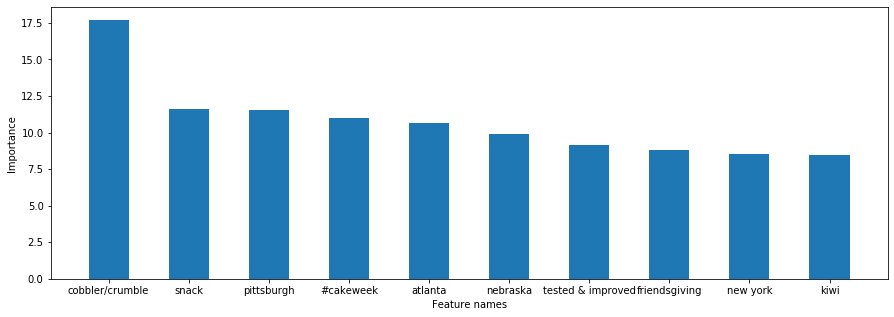

In [22]:
index = np.argsort(W)
'''print(index)
for i in index:
    print(categories[i])
    print(W[i])

'''
top_predictors_pos = []
top_wval_pos = []
for i in range(10):
    top_predictors_pos.append(categories[index[-i-1]])
    top_wval_pos.append(W[index[-i-1]])
    
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 5))
plt.bar(top_predictors_pos, top_wval_pos,width = 0.5)
plt.xlabel("Feature names")
plt.ylabel("Importance")
plt.show()

We can see that some are events, some are places and some ingredients. We can infer that the item is popular during some events, popular in certain cities and some ingredients here are the top ingredients used in dessert. We can build an intuitive analytics dashboard with all the correlations that are available with us. Now let's draw a correlation heat map to check a feature's correlation with the others.

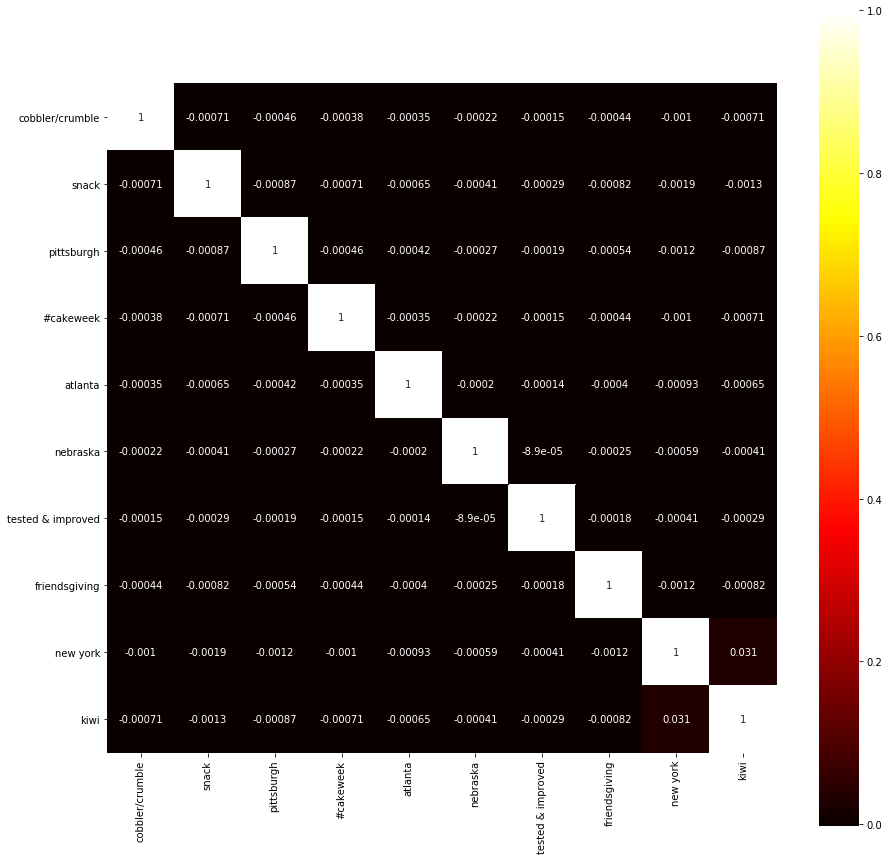

In [23]:
import seaborn as sns
corr = recipes.loc[:, top_predictors_pos].corr(method ='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='hot')

Now let's infer label for the new recipe added to our database and check the features contributing to the target.

In [24]:
recipes_sample = pd.read_csv('epi_sample.csv', sep=",", index_col=0)
recipes_sample

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
title,,,,,,,,,,,,,,,,,,,,,
Pastry Twists with Spiced Sugar-Honey Glaze,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orange-Almond Cake with Chocolate Icing,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Baked Pears with Rosemary, Gorgonzola Cheese and Port",3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dark Chocolate Wedding Cake with Chocolate Orange Ganache and Orange Buttercream,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Molten Peanut Butter and Chocolate Fondant Cakes,2.500,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
target = 'dessert'



categories.remove(target)
Xreal = recipes_sample.loc[:, categories].to_numpy()
categories.append(target)
yreal = recipes_sample.loc[:, recipes.columns== target].to_numpy().ravel()

In [26]:
yhat = logreg.predict(Xreal)

In [27]:
yhat

array([1., 1., 0., 1., 1.])

Let's check the list of existing features of our new recipe which lead to our successful classification as a dessert. 

In [28]:
recipes_one_cols = recipes_sample.iloc[[0]].isin([1]).all()

enabled_labels = []
for col in recipes.columns:
    if recipes_one_cols[col] == True:
        enabled_labels.append(col)

enabled_labels

['bon appétit',
 'cinnamon',
 'dairy free',
 'deep-fry',
 'family reunion',
 'kidney friendly',
 'peanut free',
 'soy free',
 'tree nut free',
 'white wine']